In [12]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [13]:
iris_df= pd.read_csv('iris.csv')
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = iris_df[(iris_df['Species'] == 'Iris-setosa') | (iris_df['Species'] == 'Iris-versicolor')][['SepalLengthCm', 'SepalWidthCm']]
X.columns = ['SepalLengthCm','SepalWidthCm']
y = iris_df[(iris_df['Species'] == 'Iris-setosa') | (iris_df['Species'] == 'Iris-versicolor')]['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})


#### Create a meshgrid for visualization

In [15]:

h = .02  # mash step size
x_min, x_max = X['SepalLengthCm'].min() - 1, X['SepalLengthCm'].max() + 1
y_min, y_max = X['SepalWidthCm'].min() - 1, X['SepalWidthCm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [16]:

classifiers = [
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('Logistic Regression', LogisticRegression()),
    ('Linear SVM', SVC(kernel='linear', C=1)),
    ('Quadratic SVM', SVC(kernel='poly', degree=2, C=1))
]

#### fitting  and plotting decision boundaries for each classifier

C:\Users\Asus\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Asus\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Asus\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Asus\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Asus\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


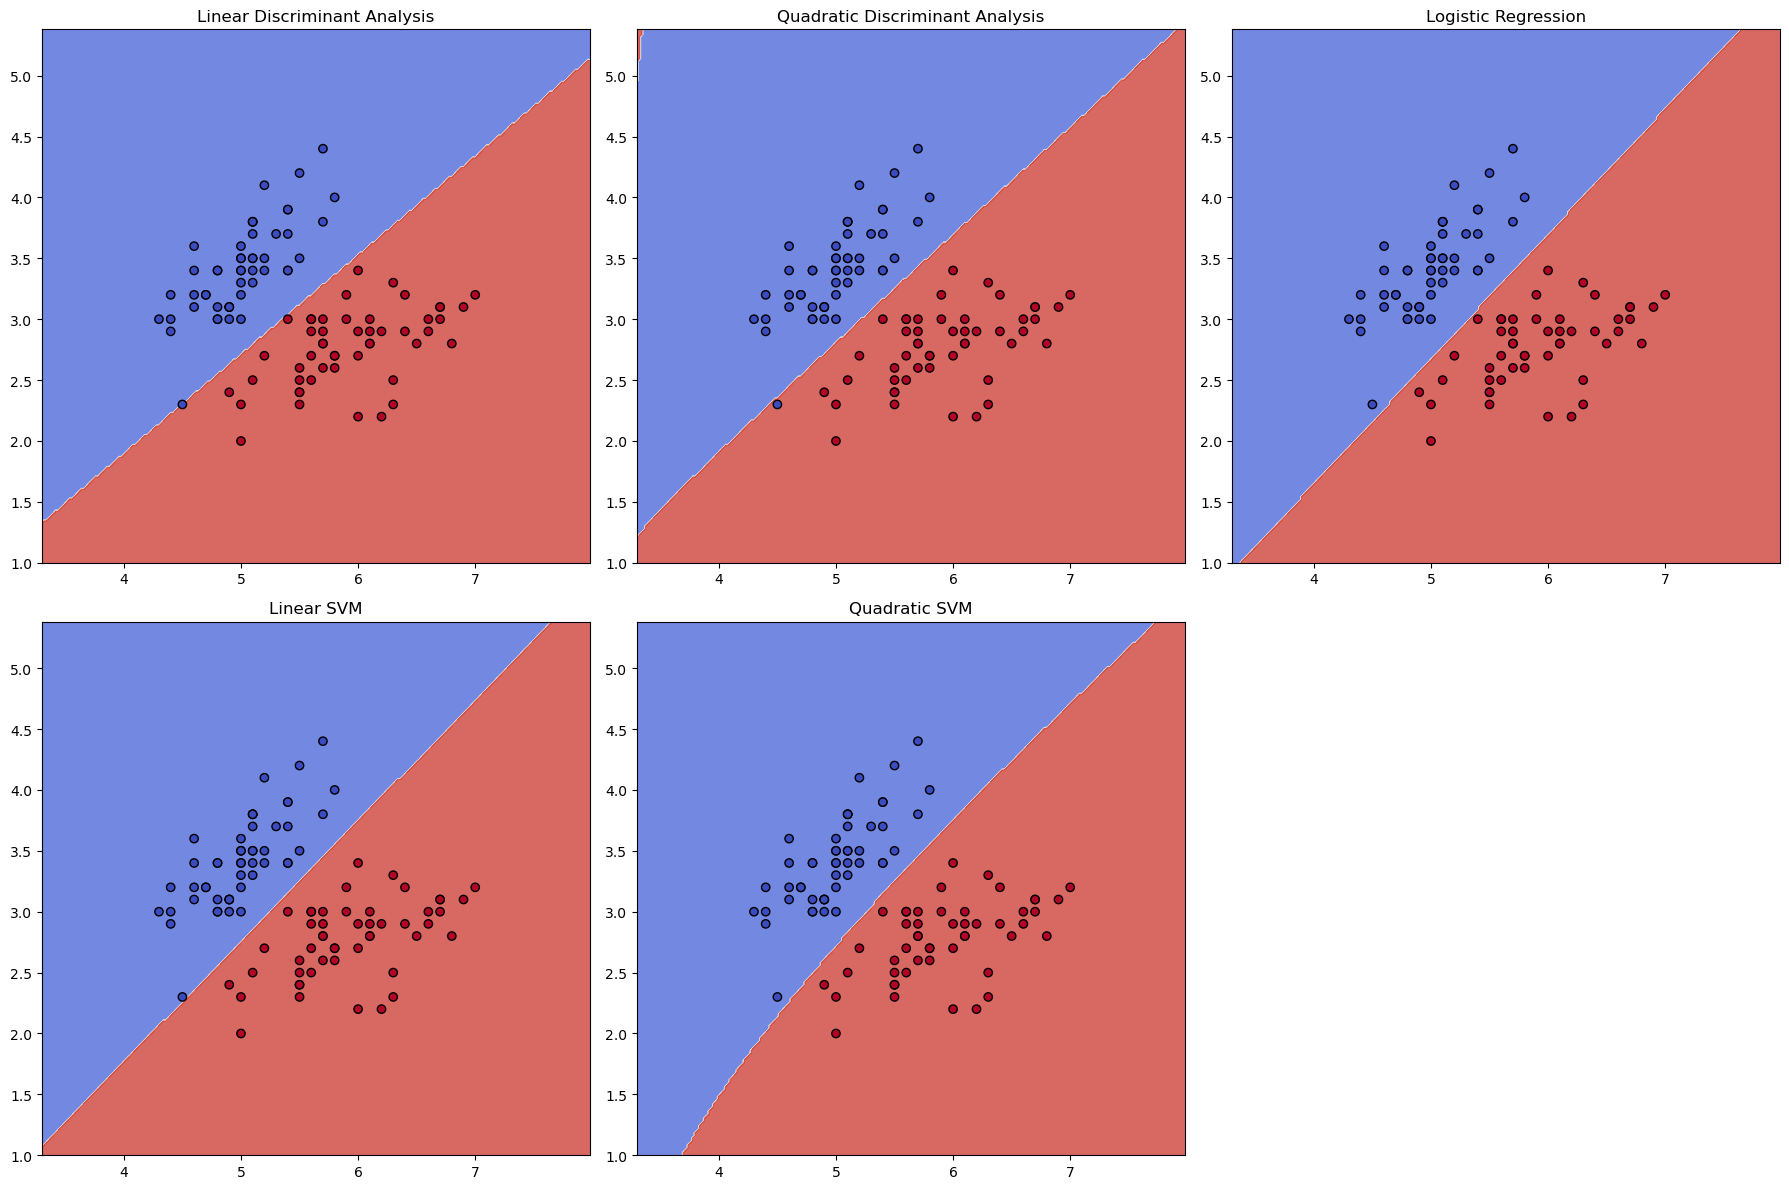

In [17]:

plt.figure(figsize=(18, 12))
for i, (name, clf) in enumerate(classifiers):
    plt.subplot(2, 3, i + 1)
    
    clf.fit(X, y)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    plt.title(name)

plt.tight_layout()
plt.show()